# New York Airbnb Data

This analysis shows prediction optimization via various machine learning technuiqes found in the sklearn module. First various visualizations will be displayed. Next, basic linear regrssion will be shown and last, a grid search fiunction will be created. Data shown below can be downloaded from Kaggle.

[New York Air bnb](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('./AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [97]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Null analysis

Null analysis is required to find holes in the data, First an analysis of the null data fields will be highligthed. Once the null values are found, a strategy for the nulls will be found. 

In [98]:
np.sum(np.sum(df.isnull())/df.shape[0]== 0 )

12

In [99]:
np.sum(df.isnull())/df.shape[0]


id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [100]:
#items with little predictive power. 
df = df.drop(['last_review','host_id', 'name', 'host_name'], axis = 1) 

In [101]:
df['reviews_per_month'].fillna((df['reviews_per_month'].mean()), inplace=True)


In [102]:
np.sum(df.isnull())/df.shape[0]



id                                0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [103]:
cat_df = df.select_dtypes(include=["object"])
cat_df

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [104]:
columns = cat_df.columns
columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [105]:
for col in columns:
    try:
        df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col])], axis=1)
    except:
        print("error in load")
df

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,2539,40.64749,-73.97237,149,1,9,0.210000,6,365,0,...,0,0,0,0,0,0,0,0,1,0
1,2595,40.75362,-73.98377,225,1,45,0.380000,2,355,0,...,0,0,0,0,0,0,0,1,0,0
2,3647,40.80902,-73.94190,150,3,0,1.373221,1,365,0,...,0,0,0,0,0,0,0,0,1,0
3,3831,40.68514,-73.95976,89,1,270,4.640000,1,194,0,...,0,0,0,0,0,0,0,1,0,0
4,5022,40.79851,-73.94399,80,10,9,0.100000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,40.67853,-73.94995,70,2,0,1.373221,2,9,0,...,0,0,0,0,0,0,0,0,1,0
48891,36485057,40.70184,-73.93317,40,4,0,1.373221,2,36,0,...,0,0,0,0,0,0,0,0,1,0
48892,36485431,40.81475,-73.94867,115,10,0,1.373221,1,27,0,...,0,0,0,0,0,0,0,1,0,0
48893,36485609,40.75751,-73.99112,55,1,0,1.373221,6,2,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
df.columns

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Bronx',
       ...
       'Williamsburg', 'Willowbrook', 'Windsor Terrace', 'Woodhaven',
       'Woodlawn', 'Woodrow', 'Woodside', 'Entire home/apt', 'Private room',
       'Shared room'],
      dtype='object', length=238)

152.7206871868289


(array([4.8597e+04, 1.8800e+02, 5.7000e+01, 1.8000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

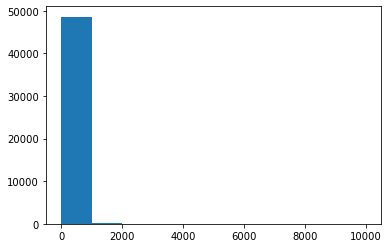

In [107]:
new =list(df['price'])
print(df['price'].mean())
plt.hist(new)


In [108]:
con_one = df['price'] < 100
con_two = df['price'] < 200
con_three = df['price'] >= 200
statements = [con_one, con_two, con_three]
choices = [0,1,2]
df['price_cat'] = np.select(statements, choices, default="")
df[['price_cat', 'price']]

,price_cat,price
0,1,149
1,2,225
2,1,150
3,0,89
4,0,80
...,...,...
48890,0,70
48891,0,40
48892,1,115
48893,0,55


In [109]:
y = df['price_cat']
x = df.drop(['price', 'price_cat'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model = lm_model.fit(x_train, y_train)
y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

r_score_test = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
r_score_train = r2_score(y_train, y_train_pred)

print([r_score_test, MSE])

[-7.239340980233288e+24, 4.214507523523556e+24]


In [110]:
y = df['price_cat' ]
x = df[['latitude', 'longitude']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model = lm_model.fit(x_train, y_train)
y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

r_score_test = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
r_score_train = r2_score(y_train, y_train_pred)

print([r_score_test, r_score_train])

[0.10355043390297436, 0.1048534060238393]


In [111]:
corr_matrix = df.corr()
#corr_matrix['price'] = corr_matrix['price'].abs()

In [112]:
corr_matrix.sort_values(by=['price'], ascending = False)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
price,0.010619,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829,-0.041030,...,-0.010963,0.001813,-0.003244,-0.015126,-0.005786,0.010306,-0.019568,0.255857,-0.240246,-0.053613
Entire home/apt,-0.054831,-0.005712,-0.192143,0.255857,0.074900,-0.010087,-0.037034,0.112193,-0.006804,-0.052092,...,-0.022021,0.004348,0.024177,-0.024850,-0.004685,0.004348,-0.034994,1.000000,-0.953470,-0.162144
Manhattan,-0.019667,0.590639,-0.433531,0.163976,0.067362,-0.045820,-0.046219,0.152842,-0.005434,-0.134730,...,-0.263294,-0.004033,-0.050617,-0.037869,-0.013378,-0.004033,-0.061977,0.160082,-0.157762,-0.009169
Midtown,0.040669,0.085871,-0.092558,0.097781,0.039508,-0.043342,-0.007018,0.049607,0.061651,-0.027289,...,-0.053329,-0.000817,-0.010252,-0.007670,-0.002710,-0.000817,-0.012553,0.069530,-0.066534,-0.010489
Tribeca,0.003718,-0.012386,-0.072126,0.084814,0.012780,-0.015942,-0.013463,0.065536,0.006286,-0.009106,...,-0.017795,-0.000273,-0.003421,-0.002559,-0.000904,-0.000273,-0.004189,0.034775,-0.032009,-0.009396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bushwick,0.025621,-0.136094,0.158728,-0.065166,-0.013093,-0.010192,-0.002311,-0.031858,-0.030163,-0.034809,...,-0.068025,-0.001042,-0.013078,-0.009784,-0.003456,-0.001042,-0.016012,-0.112812,0.111365,0.005847
Queens,0.090249,0.017145,0.622749,-0.080205,-0.032629,0.035967,0.110831,-0.033881,0.087113,-0.054693,...,-0.106883,-0.001637,-0.020548,0.117287,-0.005431,-0.001637,0.191954,-0.108505,0.100676,0.026693
Brooklyn,-0.057846,-0.672932,0.017735,-0.098603,-0.039658,0.017414,-0.041083,-0.123234,-0.079671,-0.126239,...,0.353301,-0.003779,0.067921,-0.035482,-0.012535,-0.003779,-0.058071,-0.073905,0.079464,-0.017467
longitude,0.090908,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731,0.221315,...,0.002020,-0.017637,-0.031750,0.086419,0.027375,-0.024112,0.074448,-0.192143,0.183613,0.029812


In [115]:
y = df['price_cat' ]
x = df[['longitude', 'Private room', 'Entire home/apt', 'Manhattan']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model = lm_model.fit(x_train, y_train)
y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

r_score_test = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)



print(r_score_test, MSE)

0.44883434729804716 0.32087061465438754


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

model_list = []

# model_list.append(LinearRegression().fit(x_train, y_train))
model_list.append(Lasso().fit(x_train, y_train))
model_list.append(Ridge().fit(x_train, y_train))
model_list.append(ElasticNet().fit(x_train, y_train))
#model_list.append(BayesianRidge().fit(x_train, y_train))



answer_dict = {}

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = dict(alpha=alpha)

for model in model_list:
    fitted_model = model.fit(x_train, y_train)
    grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring='r2', verbose=1, n_jobs=-1)
    grid_result = grid.fit(x_train, y_train)
    print(model)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Lasso()
Best Score:  0.07917262125806764
Best Params:  {'alpha': 0.001}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ridge()
Best Score:  0.07917267516055966
Best Params:  {'alpha': 0.1}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
ElasticNet()
Best Score:  0.07902371658241311
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [116]:
print(df.dtypes)

id                   int64
latitude           float64
longitude          float64
price                int64
minimum_nights       int64
                    ...   
Woodside             uint8
Entire home/apt      uint8
Private room         uint8
Shared room          uint8
price_cat           object
Length: 239, dtype: object


In [120]:
import tensorflow as tf

tf.keras.backend.set_floatx('float64')

y = df['price_cat' ]
x =  df[['longitude', 'Private room', 'Entire home/apt', 'Manhattan']]


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)



#target = df.pop('price')

dataset = tf.data.Dataset.from_tensor_slices((x.values, y.values))

# for feat, targ in dataset.take(5):
#     print ('Features: {}, Target: {}'.format(feat, targ))

#train_dataset = dataset.shuffle(len(df)).batch(1)





def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
      ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.MSE,
                metrics=['accuracy'])
    return model

n_epochs = 25
batch_size = 10
callbacks_list = None
model = get_compiled_model()
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
              epochs=n_epochs, batch_size=batch_size)


Epoch 1/25


UnimplementedError:  Cast string to double is not supported
	 [[node mean_squared_error/Cast (defined at <ipython-input-120-176fe407642c>:42) ]] [Op:__inference_train_function_1189451]

Function call stack:
train_function


TypeError: cannot pickle '_thread.RLock' object

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.11585045702618946 35708.41965819436
